In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import seaborn as sns
from statsmodels import api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import os
import numpy as np
import math

In [2]:
df = pd.read_csv( os.path.join('csv_label', 'learning_data_10.csv') )
df=df[df['day']<=2]
df

,original,label,time,day
0,53.4,0,15,0
1,52.8,0,15,0
2,52.8,0,15,0
3,53.2,0,15,0
4,53.6,0,15,0
...,...,...,...,...
1151450,53.6,0,6,2
1151451,53.8,0,6,2
1151452,53.1,0,6,2
1151453,53.0,0,6,2


In [3]:
def make_data(x, str,w):
    x=pd.DataFrame(x)
    window=w
    for i in range(1, window):
        column=f'{str}_lag{i}'
        x[column]=x[str].shift(i)
    return x

def make_label(x, w):
    window=w
    x['label_all']=x['label']
    for i in range(1, window):
        x.loc[(x['label_all']==1)|(x['label'].shift(i)==1), 'label_all']=1
        x.loc[(x['label_all']==0)&(x['label'].shift(i)==0), 'label_all']=0
    
    x['label']=x['label_all']
    return x[['label']]

df_list=[]
for i in set(df['day']):
    lag=[] 
    window=500
    lag.append(make_data(df.loc[df['day']==i, ['original']], 'original', window))
    lag.append(df.loc[df['day']==i, ['day']])
    lag.append(make_label(df.loc[df['day']==i, ['label']], window))
    df_add_lag=pd.concat(lag, axis=1)
    df_list.append(df_add_lag)
df=pd.concat(df_list)
df=df.dropna().reset_index(drop=True)
df


C:\Users\Arakawa\AppData\Local\Temp/ipykernel_13340/688226421.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x[column]=x[str].shift(i)


,original,original_lag1,original_lag2,original_lag3,original_lag4,original_lag5,original_lag6,original_lag7,original_lag8,original_lag9,...,original_lag492,original_lag493,original_lag494,original_lag495,original_lag496,original_lag497,original_lag498,original_lag499,day,label
0,51.9,52.2,52.3,51.4,51.5,51.3,49.6,49.1,49.2,49.8,...,55.7,54.7,54.0,53.6,53.2,52.8,52.8,53.4,0,0
1,51.3,51.9,52.2,52.3,51.4,51.5,51.3,49.6,49.1,49.2,...,55.5,55.7,54.7,54.0,53.6,53.2,52.8,52.8,0,0
2,52.4,51.3,51.9,52.2,52.3,51.4,51.5,51.3,49.6,49.1,...,55.7,55.5,55.7,54.7,54.0,53.6,53.2,52.8,0,0
3,54.2,52.4,51.3,51.9,52.2,52.3,51.4,51.5,51.3,49.6,...,55.6,55.7,55.5,55.7,54.7,54.0,53.6,53.2,0,0
4,53.9,54.2,52.4,51.3,51.9,52.2,52.3,51.4,51.5,51.3,...,55.8,55.6,55.7,55.5,55.7,54.7,54.0,53.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149953,53.6,54.3,55.1,55.2,55.6,56.2,56.4,56.8,56.4,56.0,...,45.3,45.0,45.2,45.1,45.1,45.4,45.2,45.1,2,0
1149954,53.8,53.6,54.3,55.1,55.2,55.6,56.2,56.4,56.8,56.4,...,45.0,45.3,45.0,45.2,45.1,45.1,45.4,45.2,2,0
1149955,53.1,53.8,53.6,54.3,55.1,55.2,55.6,56.2,56.4,56.8,...,45.0,45.0,45.3,45.0,45.2,45.1,45.1,45.4,2,0
1149956,53.0,53.1,53.8,53.6,54.3,55.1,55.2,55.6,56.2,56.4,...,45.0,45.0,45.0,45.3,45.0,45.2,45.1,45.1,2,0


In [5]:
df_stats=[]
df_stats.append(df.mean(axis=1).rename('mean'))
df_stats.append(df.quantile(0.25, axis=1).rename('25%'))
df_stats.append(df.quantile(0.5, axis=1).rename('50%'))
df_stats.append(df.quantile(0.75, axis=1).rename('75%'))
# df_stats.append(df.skew(axis=1).rename('skew'))
# df_stats.append(df.kurt(axis=1).rename('kurt'))
df_stats.append(df.round().mode(axis=1).dropna(axis=1).rename(columns={0:'mode'}))
# df_stats.append(df.max(axis=1).rename('max'))
data=pd.concat(df_stats, axis=1)
df=pd.concat([data, df['day'], df['label'], df['original']], axis=1)
df

,mean,25%,50%,75%,mode,day,label,original
0,55.265139,50.9,54.9,60.6,48.0,0,0,51.9
1,55.260956,50.9,54.9,60.6,48.0,0,0,51.3
2,55.260159,50.9,54.9,60.6,48.0,0,0,52.4
3,55.262948,50.9,54.9,60.6,48.0,0,0,54.2
4,55.264343,50.9,54.9,60.6,48.0,0,0,53.9
...,...,...,...,...,...,...,...,...
1149953,46.097012,45.0,45.3,46.0,45.0,2,0,53.6
1149954,46.114343,45.0,45.3,46.0,45.0,2,0,53.8
1149955,46.130080,45.0,45.3,46.0,45.0,2,0,53.1
1149956,46.145219,45.0,45.3,46.0,45.0,2,0,53.0


In [6]:
test_day=[2]
train=df[(df['label']==0)&(~df['day'].isin(test_day))][df.columns[:-3]].values
test=df[(df['day'].isin(test_day))][df.columns[:-3]].values
train

array([[55.26513944, 50.9       , 54.9       , 60.6       , 48.        ],
       [55.26095618, 50.9       , 54.9       , 60.6       , 48.        ],
       [55.26015936, 50.9       , 54.9       , 60.6       , 48.        ],
       ...,
       [50.66733068, 45.8       , 47.65      , 54.8       , 46.        ],
       [50.6625498 , 45.8       , 47.6       , 54.8       , 46.        ],
       [50.65796813, 45.8       , 47.55      , 54.8       , 46.        ]])

In [7]:
from sklearn.ensemble import IsolationForest
# IsolationForest
model = IsolationForest(n_estimators=100, random_state=42)
model.fit(test)
score=model.score_samples(test)
score

array([-0.55048035, -0.55048035, -0.55048035, ..., -0.62159543,
       -0.61991546, -0.61865845])

In [8]:
test_for_plot=df.loc[df['day'].isin(test_day), 'original'].values[window-1:]
test_for_plot

array([46.6, 47. , 47.2, ..., 53.1, 53. , 51.6])

In [18]:
data_unit=17999
num_ax=math.floor(len(test_for_plot)/data_unit)
label=df[(df['day'].isin(test_day))]['label'].values*100
label_index=range(len(label))
abnorm=((score*-1+0.5)*10)
abnorm

array([10.50480346, 10.50480346, 10.50480346, ..., 11.21595434,
       11.19915457, 11.18658454])

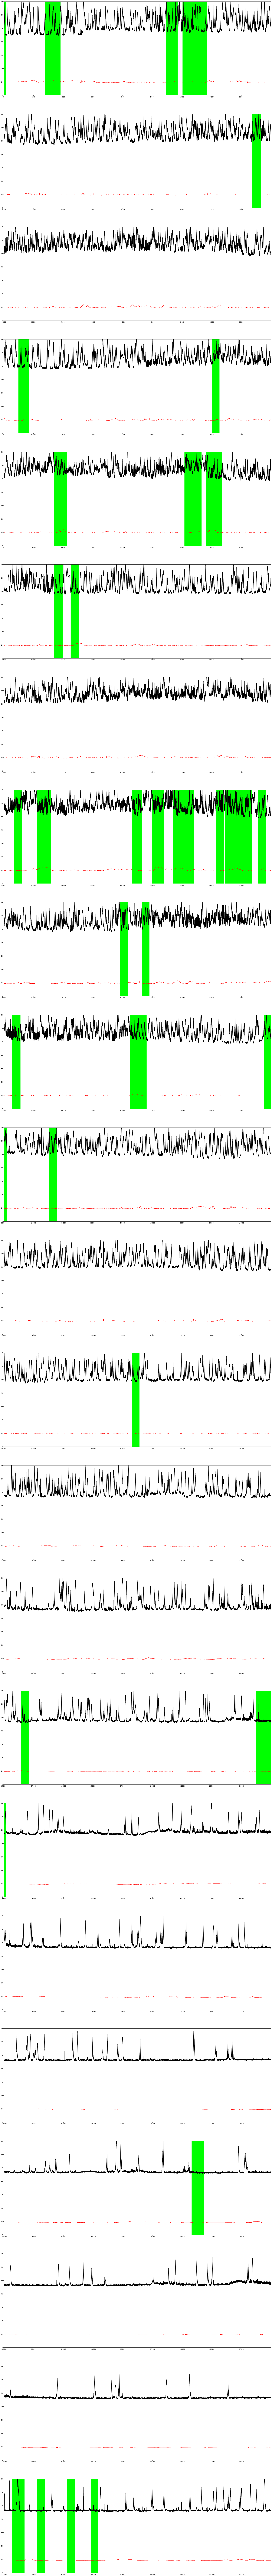

In [19]:
fig, ax=plt.subplots(num_ax, 1, figsize=(35, 15*num_ax))
data_unit=17999
for i in range(num_ax):
    ax[i].plot(abnorm, '-r',linewidth = 1 )
    ax[i].plot(test_for_plot, '-k',linewidth = 2)
    ax[i].fill_between(label_index, label, facecolor='lime' )
    ax[i].set_ylim(0, 70)
    ax[i].set_xlim(i*(data_unit), (data_unit)*(i+1))
plt.show()